# Nulos a gestionar

- **Price** -> Tiene 40 nulos (2%).
- **Discount** -> Tiene 40 nulos (2%).
- **Payment Method** -> Al parecer tiene 1753 nulos (87.65%). 
- **Shipping Method** -> Al parecer tiene 1753 nulos (87.65%).
- **Customer Age** -> Tiene 40 nulos.
- **Coupon Used** -> Al parecer tiene 1753 nulos (87.65%).

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


In [3]:
df_o = pd.read_csv('../data/data_limpio.csv')
df_o.sample(2)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
1451,1452,b,2022-03-28,0,sports,1412,football,0,272.26,0.16,...,NaN,east,19.0,f,mobile,27,NaN,edge,email,no
95,96,a,2022-03-05,0,beauty,1632,mascara,0,68.81,0.23,...,NaN,south,46.0,f,desktop,25,NaN,other,paid,no


## Copia de fichero

In [4]:
df = df_o.copy()

## Calculo cantidad nulos

In [5]:
 # porcentaje de nulos
df.isnull().mean()*100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [6]:
#Genero un DF de nulos
df_nulos = df.loc[:, df.isnull().sum() > 0]
df_nulos

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


---
# Nulos categóricas

In [7]:
#Veo si alguna se destaca por tener muchos nulos respecto al resto
#df_nulos.isnull().mean().sort_values(ascending=False)
#Cantidas de registros df.shape[0]
for col in df_nulos.select_dtypes(include='O').columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print('-------------------')

PAYMENT_METHOD


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

-------------------
SHIPPING_METHOD


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

-------------------
COUPON_USED


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

-------------------


In [8]:
def subplot_col_cat(dataframe):

    # Seleccionar columnas categóricas
    categorical_cols = dataframe.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:

        return "No hay columnas categoricas en el DataFrame."

    # fonfigurar el·tamaño de· la· figura
    num_cols = len(categorical_cols)
    rows = (num_cols + 2) // 3 # Calcular filas necesarias para 3 columnas por fila
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axes = axes.flatten() # Convertir los ejes a un array de una 1d plano para fácil iteración

    # Generar gráficos para cada columna categórica
    for i, col in enumerate(categorical_cols):
        sns.countplot (data=dataframe, x=col, ax=axes[i], hue=col, palette="tab10", legend=False)
        axes[i].set_title(f'Distribucion de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel( 'Frecuencia')
        axes[i].tick_params (axis='x', rotation=90) # Rotar etiquetas si es necesario

    # Eliminar ejes sobrantes si hay menos columnas que subplots
    for j in range(i + 1, len(axes)) :
        fig.delaxes(axes[j])

    # Ajustar diseño
    plt. tight_layout ()
    plt. show()

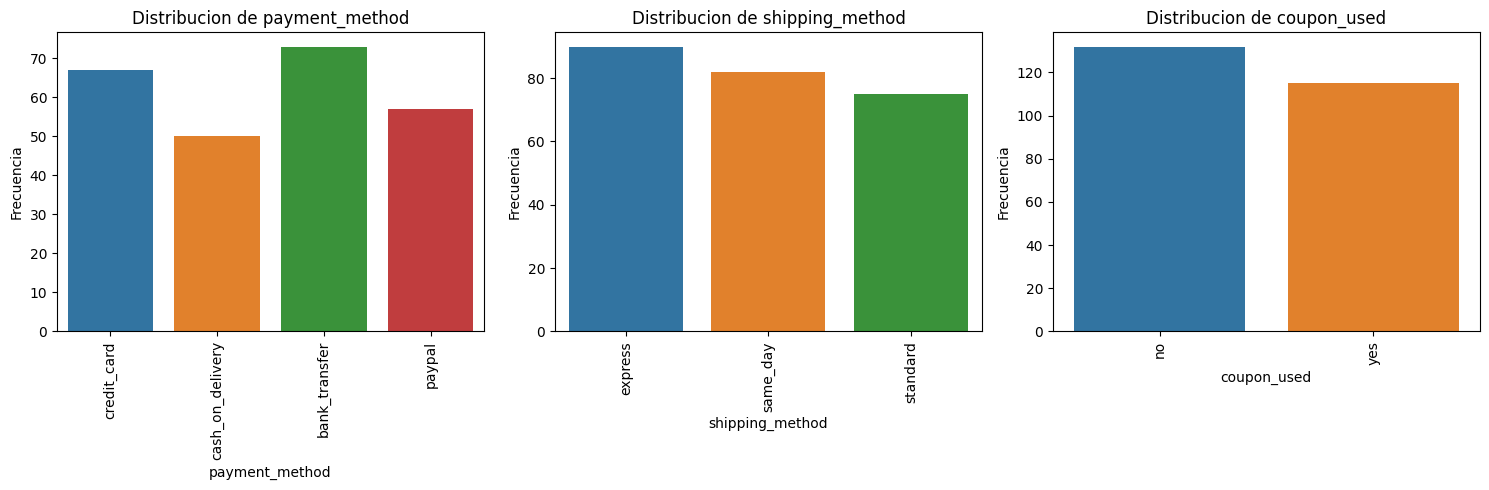

In [9]:
subplot_col_cat(df_nulos)

In [10]:
#Cantidad de nulos en columnas categoricas en porcentaje, hay varios pero ninguno destaca, no vale la pena aplicar media. La mayoria de los nulos en métodos de pago se da en columna 'conversion' al no comprar. 
df_nulos.select_dtypes(include='O').isnull().mean()*100

payment_method     87.65
shipping_method    87.65
coupon_used        87.65
dtype: float64

In [11]:
df[['user_id' , 'conversion', 'payment_method', 'shipping_method', 'coupon_used']].sample(15)


,user_id,conversion,payment_method,shipping_method,coupon_used
461,462,0,NaN,NaN,NaN
605,606,0,NaN,NaN,NaN
1105,1106,0,NaN,NaN,NaN
760,761,0,NaN,NaN,NaN
413,414,0,NaN,NaN,NaN
367,368,0,NaN,NaN,NaN
451,452,0,NaN,NaN,NaN
824,825,1,paypal,same_day,no
73,74,1,credit_card,same_day,yes
1858,1859,0,NaN,NaN,NaN


In [12]:
df_nocompra = df[df['conversion'] == 0]
df_nocompra.isnull().mean()*100

user_id               0.000000
group                 0.000000
visit_date            0.000000
conversion            0.000000
product_category      0.000000
product_id            0.000000
product_name          0.000000
quantity              0.000000
price                 1.711352
discount              1.939532
total_value           0.000000
payment_method      100.000000
shipping_method     100.000000
region                0.000000
customer_age          2.110667
customer_gender       0.000000
device                0.000000
session_duration      0.000000
coupon_used         100.000000
browser               0.000000
referral_source       0.000000
conversion_str        0.000000
dtype: float64

In [13]:
df_sicompra = df[df['conversion'] == 1]
df_sicompra.isnull().mean()*100

user_id             0.000000
group               0.000000
visit_date          0.000000
conversion          0.000000
product_category    0.000000
product_id          0.000000
product_name        0.000000
quantity            0.000000
price               4.048583
discount            2.429150
total_value         0.000000
payment_method      0.000000
shipping_method     0.000000
region              0.000000
customer_age        1.214575
customer_gender     0.000000
device              0.000000
session_duration    0.000000
coupon_used         0.000000
browser             0.000000
referral_source     0.000000
conversion_str      0.000000
dtype: float64

Se ha comprobado que los nulos de las columnas categóricas son debido a que no se ha realziado la compra, por lo tanto no tienen método de pago, método de transporte ni se ha utilizado ningún cupón.

In [14]:
#Realmente los nulos en las columnas categoricas son debido a que no se ha realziado la compra.
df.loc[:, df.select_dtypes(include='O').columns] = df.select_dtypes(include='O').fillna('no_compra')

In [15]:
#Compruebo que ya no hay nulos en las columnas categoricas, sólo quedan en las numéricas
df.isnull().mean()*100

user_id             0.0
group               0.0
visit_date          0.0
conversion          0.0
product_category    0.0
product_id          0.0
product_name        0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
payment_method      0.0
shipping_method     0.0
region              0.0
customer_age        2.0
customer_gender     0.0
device              0.0
session_duration    0.0
coupon_used         0.0
browser             0.0
referral_source     0.0
conversion_str      0.0
dtype: float64

In [16]:
df.sample(10)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
373,374,b,2022-01-21,0,books,1622,science_fiction,0,31.40,0.11,...,no_compra,east,57.0,m,mobile,21,no_compra,safari,organic,no
1812,1813,a,2022-03-07,0,fashhion,1620,t-shirt,0,60.48,0.15,...,no_compra,west,28.0,f,desktop,24,no_compra,other,organic,no
1511,1512,b,2022-03-08,0,fashhion,1218,jeans,0,149.43,0.29,...,no_compra,west,59.0,f,tablet,8,no_compra,other,organic,no
153,154,a,2022-01-02,0,fashhion,1424,t-shirt,0,169.52,0.19,...,no_compra,central,63.0,m,mobile,8,no_compra,safari,organic,no
1548,1549,a,2022-01-01,0,home,1116,sofa,0,237.82,0.01,...,no_compra,south,65.0,other,tablet,4,no_compra,firefox,social,no
1377,1378,b,2022-01-14,0,home,1264,chair,0,79.34,0.18,...,no_compra,south,27.0,other,desktop,25,no_compra,chrome,organic,no
1469,1470,b,2022-03-07,0,home,1056,lamp,0,222.26,0.07,...,no_compra,north,61.0,m,desktop,17,no_compra,edge,organic,no
830,831,a,2022-03-13,0,fashhion,1312,jeans,0,60.44,0.10,...,no_compra,south,21.0,f,tablet,5,no_compra,safari,paid,no
1738,1739,a,2022-02-03,0,sports,1470,running_shoes,0,243.23,0.22,...,no_compra,west,68.0,f,mobile,10,no_compra,edge,social,no
224,225,a,2022-02-27,0,beauty,1864,lotion,0,108.27,0.27,...,no_compra,central,28.0,f,desktop,1,no_compra,firefox,paid,no


---
# Outliers numéricas

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2000.0,1000.500000,577.494589,1.00,500.7500,1000.500,1500.250,2000.00
conversion,2000.0,0.123500,0.329093,0.00,0.0000,0.000,0.000,1.00
product_id,2000.0,1501.560000,287.188372,1000.00,1256.0000,1510.500,1746.500,1998.00
quantity,2000.0,0.371000,1.096339,0.00,0.0000,0.000,0.000,5.00
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
total_value,2000.0,51.754830,234.575099,0.00,0.0000,0.000,0.000,2904.07
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00
session_duration,2000.0,15.633500,8.692235,1.00,8.0000,16.000,23.000,30.00


In [18]:
def subplot_col_num (dataframe):

    col_nums = dataframe.select_dtypes(include= 'number').columns
    num_graph = len(col_nums)

    num_rows = (num_graph +2 )//2

    fig, axes = plt.subplots(num_graph, 2, figsize=(15, num_rows*5))

    for i, col in enumerate(col_nums):

        sns.histplot (data=dataframe, x=col, ax=axes [i,0], bins=200)
        axes[i,0].set_title(f'Distribucion de {col}')
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel('Frecuencia')
        
        sns.boxplot(data=dataframe, x=col, ax = axes [i, 1])
        axes [i,1].set_title(f'Boxplot de {col}')
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

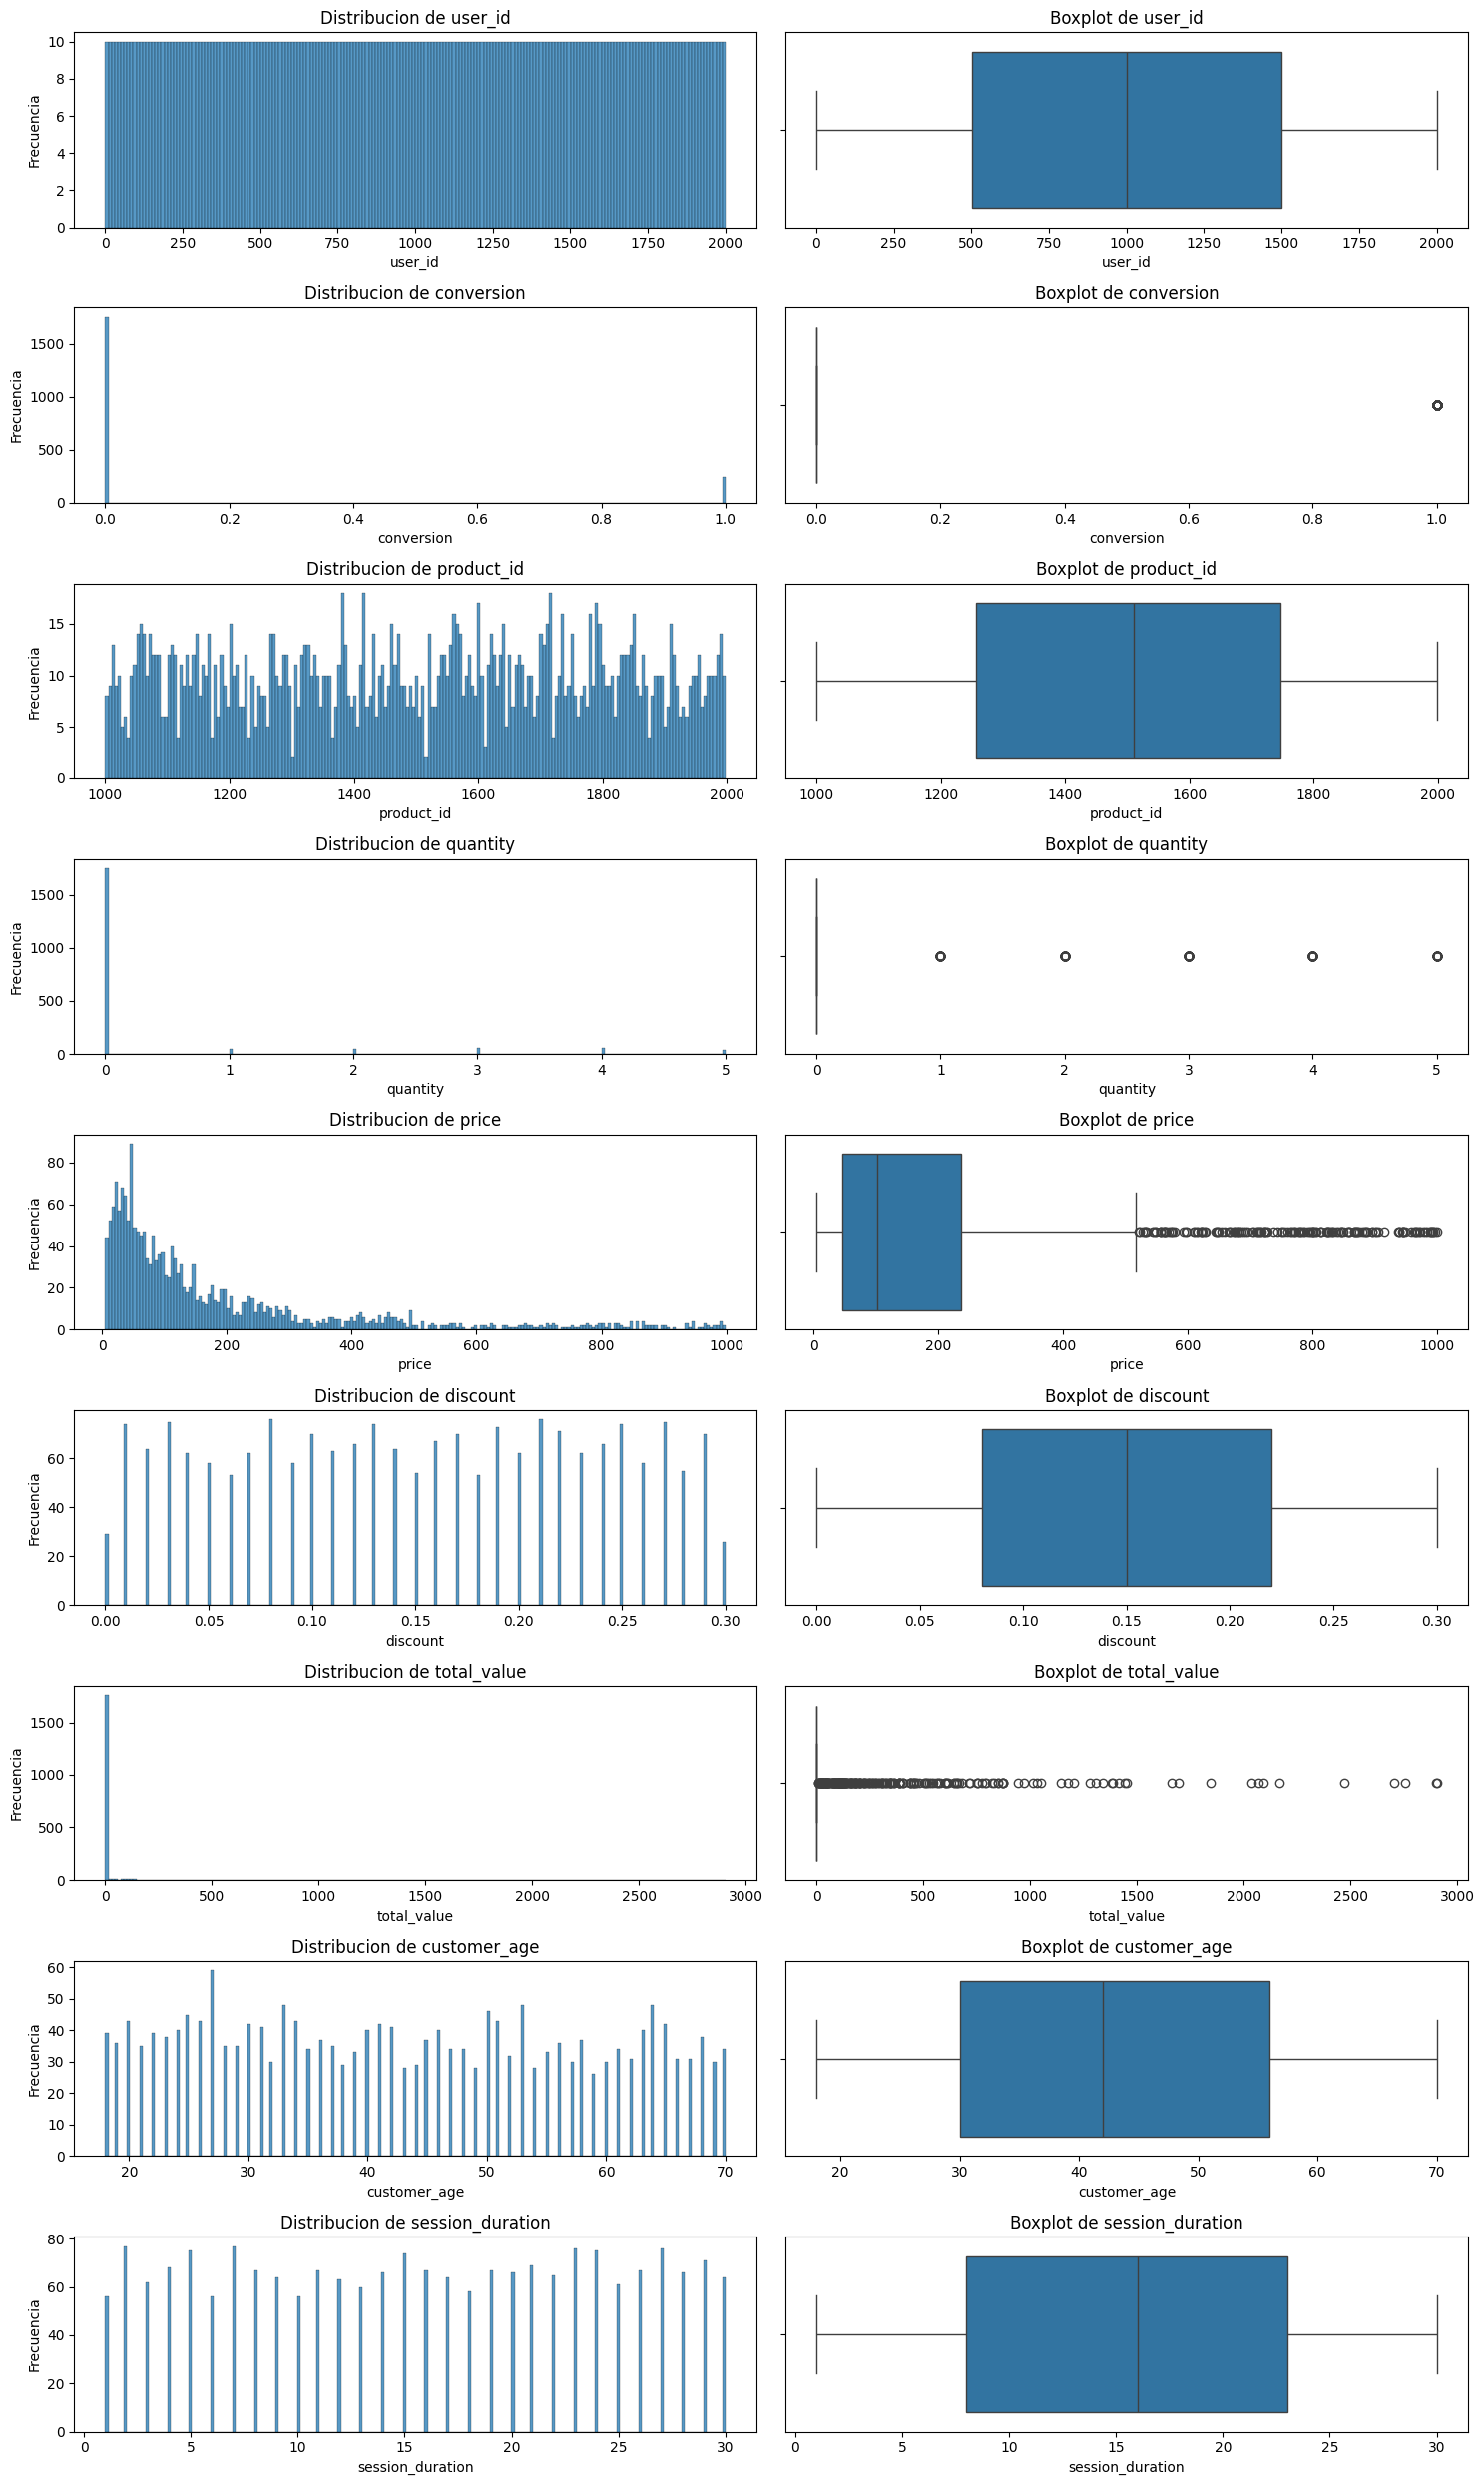

In [19]:
subplot_col_num(df)

Con los gráficos se identifica que **Preice** y **Total_value**, tienen outliers

In [20]:
#En lugar de eliminar los outliers, calculo la cantidad.

#Saco los quartiles
def calculo_outliers (df, cols):
    for col in cols:
        q_75 = df[col].quantile(0.75)
        q_25 = df[col].quantile(0.25)
        rango_itq = q_75 - q_25

        inferior = q_25 - (rango_itq*1.5)
        superior = q_75 + (rango_itq*1.5)

        outliers = df[(df[col] < inferior) | (df[col] > superior)]
        num_outliers = len(outliers)
        per_outliers = num_outliers / df.shape[0]*100

        print(f'El la columna {col.upper()} tenemos un total de {num_outliers} outliers, lo que representa un {per_outliers}% del total.')
        



In [21]:
calculo_outliers(df,['price', 'total_value'])

El la columna PRICE tenemos un total de 161 outliers, lo que representa un 8.05% del total.
El la columna TOTAL_VALUE tenemos un total de 247 outliers, lo que representa un 12.35% del total.


En ambos casos el porcentaje es alto.
Price tiene menos del 5% de nulos pero como tiene muchos outliers usaremos estadísticos avanzados.

# Nulos numéricas

In [22]:
#desd
df_nulos.select_dtypes(include='number').isnull().mean()*100

price           2.0
discount        2.0
customer_age    2.0
dtype: float64

In [23]:
df_nulos.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00


In [ ]:
#Reemplazo nulos en discount por la media y en customer_age por la mediana
df_filled_simple = df.fillna({
                  'discount': df['discount'].mean(),
                  'customer_age': df['customer_age'].median()  
  })

In [25]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
dtype: int64

In [30]:
def imputar_iterative(dataframe, lista_columas):
    iter_imputer = IterativeImputer(max_iter=50,
                                random_state=42)
    data_imputed = iter_imputer.fit_transform(dataframe[lista_columas])
    new_col = [col + "_iterative" for col in lista_columas]
    dataframe [new_col] = data_imputed
    return dataframe

In [37]:
def imputar_knn(dataframe, lista_columas):
    knn_imputer = KNNImputer(n_neighbors=5)
    data_imputed = knn_imputer.fit_transform(dataframe[lista_columas])
    new_col = [col + "_knn" for col in lista_columas]
    dataframe [new_col] = data_imputed
    return dataframe

In [35]:
df_filled_simple = imputar_iterative(df_filled_simple, ['price'])
df_filled_simple.sample()

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative
1534,1535,a,2022-02-17,0,electronics,1979,headphones,0,826.01,0.21,...,west,61.0,m,mobile,22,no_compra,chrome,social,no,826.01


In [38]:
df_filled_simple = imputar_knn(df_filled_simple, ['price'])
df_filled_simple.sample()

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative,price_knn
360,361,a,2022-03-28,0,sports,1569,tennis_racket,0,145.59,0.11,...,27.0,f,tablet,11,no_compra,edge,organic,no,145.59,145.59


In [40]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
price_iterative      0
price_knn            0
dtype: int64

In [42]:
df_filled_simple[['price', 'price_iterative', 'price_knn']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.1550,998.88
price_iterative,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88
price_knn,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88


In [ ]:
#Los valores son muy similares, me quedo con el de KNN que es un poco más conservador en los extremos, al igual que con lo anterior reemplazo valores y luego elimino los otros.
df_filled_simple.drop(columns=['price', 'price_iterative'], inplace=True)

In [46]:
df_filled_simple.isnull().sum()

user_id             0
group               0
visit_date          0
conversion          0
product_category    0
product_id          0
product_name        0
quantity            0
discount            0
total_value         0
payment_method      0
shipping_method     0
region              0
customer_age        0
customer_gender     0
device              0
session_duration    0
coupon_used         0
browser             0
referral_source     0
conversion_str      0
price_knn           0
dtype: int64

In [47]:
#Guardo el dataframe limpio
df_filled_simple.to_csv('../data/data_limpio_nonulos.csv', index=False)